## Exploratory Data Analysis and Preprocessing 

### Import necessary modules

In [35]:
# Verify installations
import sys
print(f"Python version: {sys.version}")

try:
    import pandas as pd
    print("✓ pandas imported successfully")
except ImportError as e:
    print(f"✗ pandas import failed: {e}")

try:
    import numpy as np
    print("✓ numpy imported successfully")
except ImportError as e:
    print(f"✗ numpy import failed: {e}")

try:
    import matplotlib.pyplot as plt
    print("✓ matplotlib imported successfully")
except ImportError as e:
    print(f"✗ matplotlib import failed: {e}")

try:
    import seaborn as sns
    print("✓ seaborn imported successfully")
except ImportError as e:
    print(f"✗ seaborn import failed: {e}")

try:
    import plotly.express as px
    print("✓ plotly imported successfully")
except ImportError as e:
    print(f"✗ plotly import failed: {e}")

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

Python version: 3.13.5 (v3.13.5:6cb20a219a8, Jun 11 2025, 12:23:45) [Clang 16.0.0 (clang-1600.0.26.6)]
✓ pandas imported successfully
✓ numpy imported successfully
✓ matplotlib imported successfully
✓ seaborn imported successfully
✓ plotly imported successfully


### Load and get to know the data
- Load the data into a pandas DataFrame.
- Use `.head()` to see the first few rows.
- Use `.replace()` to replaced '?' with `np.nan`
- Use `.describe()` to get basic statistics for numerical columns.
- Use `.info()` to see data size (1000*40), column names, non-null counts, and data types.
- What do the different columns mean? -- variables about customer, policy, claim, auto 

- Crucially, ask these questions:
  - Are there missing values? -- yes; solution? -- filling missing values with their mode, see next section
  - What is my target variable? -- `fraud_reported` has `Y` or `N` as value.  
  - Are there any columns that need cleaning (e.g., dates stored as text, currency with '$' signs)? -- no

In [36]:
df = pd.read_csv('data/train_claims.csv')

In [37]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,241,45,596785,2014-03-04,IL,500/1000,2000,1104.50,0,432211,...,NO,91650,14100,14100,63450,Accura,TL,2011,N,NaN
1,65,23,876699,1999-12-12,OH,250/500,1000,1099.95,0,473109,...,YES,52400,6550,6550,39300,Accura,MDX,2005,Y,NaN
2,289,45,943425,1999-10-28,OH,250/500,2000,1221.41,0,466289,...,NO,2700,300,300,2100,Honda,Accord,2006,N,NaN
3,63,26,550930,1995-10-12,IL,500/1000,500,1500.04,6000000,613826,...,YES,5160,860,860,3440,Accura,TL,2004,N,NaN
4,257,43,797636,1992-05-19,IN,100/300,1000,974.84,0,468984,...,YES,85320,21330,7110,56880,Nissan,Pathfinder,2006,N,NaN


In [38]:
df.replace('?', np.nan, inplace=True) # unknown denoted by '?', let's replace them with np.nan 

In [39]:
df.describe() # summary statistics of numerical columns; set "include='object'" for categorical columns

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,800.000000,800.000000,800.000000,800.000000,800.000000,8.000000e+02,800.000000,800.00000,800.00000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,0.0
mean,206.655000,39.172500,550103.858750,1141.250000,1257.474875,1.151250e+06,500722.883750,25403.25000,-27255.75000,11.64500,1.815000,1.000000,1.478750,53282.662500,7529.962500,7465.737500,38286.962500,2004.953750,NaN
std,114.015812,9.073348,258016.900142,613.815444,248.817871,2.354316e+06,71679.968878,28073.79092,28137.60336,6.99948,1.013439,0.820574,1.120767,26525.045525,4921.045924,4826.501383,18964.869318,5.999091,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.00000,-111100.00000,0.00000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,120.750000,32.000000,337547.250000,500.000000,1083.700000,0.000000e+00,447466.250000,0.00000,-52350.00000,6.00000,1.000000,0.000000,0.000000,42805.000000,4420.000000,4602.500000,31115.000000,2000.000000,NaN
50%,206.500000,39.000000,547773.000000,1000.000000,1257.200000,0.000000e+00,466176.000000,0.00000,-27650.00000,12.00000,1.000000,1.000000,1.000000,58300.000000,6845.000000,6805.000000,42370.000000,2005.000000,NaN
75%,280.000000,45.000000,767013.500000,2000.000000,1422.657500,0.000000e+00,603251.000000,51400.00000,0.00000,17.25000,3.000000,2.000000,2.000000,71212.500000,11380.000000,10860.000000,51177.500000,2010.000000,NaN
max,479.000000,64.000000,998865.000000,2000.000000,2047.590000,1.000000e+07,620869.000000,98800.00000,0.00000,23.00000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [40]:
df.info() # show a concise summary of DataFrame's structure and completeness

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           800 non-null    int64  
 1   age                          800 non-null    int64  
 2   policy_number                800 non-null    int64  
 3   policy_bind_date             800 non-null    object 
 4   policy_state                 800 non-null    object 
 5   policy_csl                   800 non-null    object 
 6   policy_deductable            800 non-null    int64  
 7   policy_annual_premium        800 non-null    float64
 8   umbrella_limit               800 non-null    int64  
 9   insured_zip                  800 non-null    int64  
 10  insured_sex                  800 non-null    object 
 11  insured_education_level      800 non-null    object 
 12  insured_occupation           800 non-null    object 
 13  insured_hobbies     

### Handling missing values
For variables that have missing values, fill the missing values with the mode (most frequent value):
- 'collision_type' 
- 'authorities_contacted': no missing values in the author's output
- 'property_damage'
- 'police_report_available'

In [41]:
df.isna().sum()
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['authorities_contacted'] = df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])
df.isna().sum() # check if missing values are filled

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                   0
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                  0
bodily_injuries     

### Decide X and y

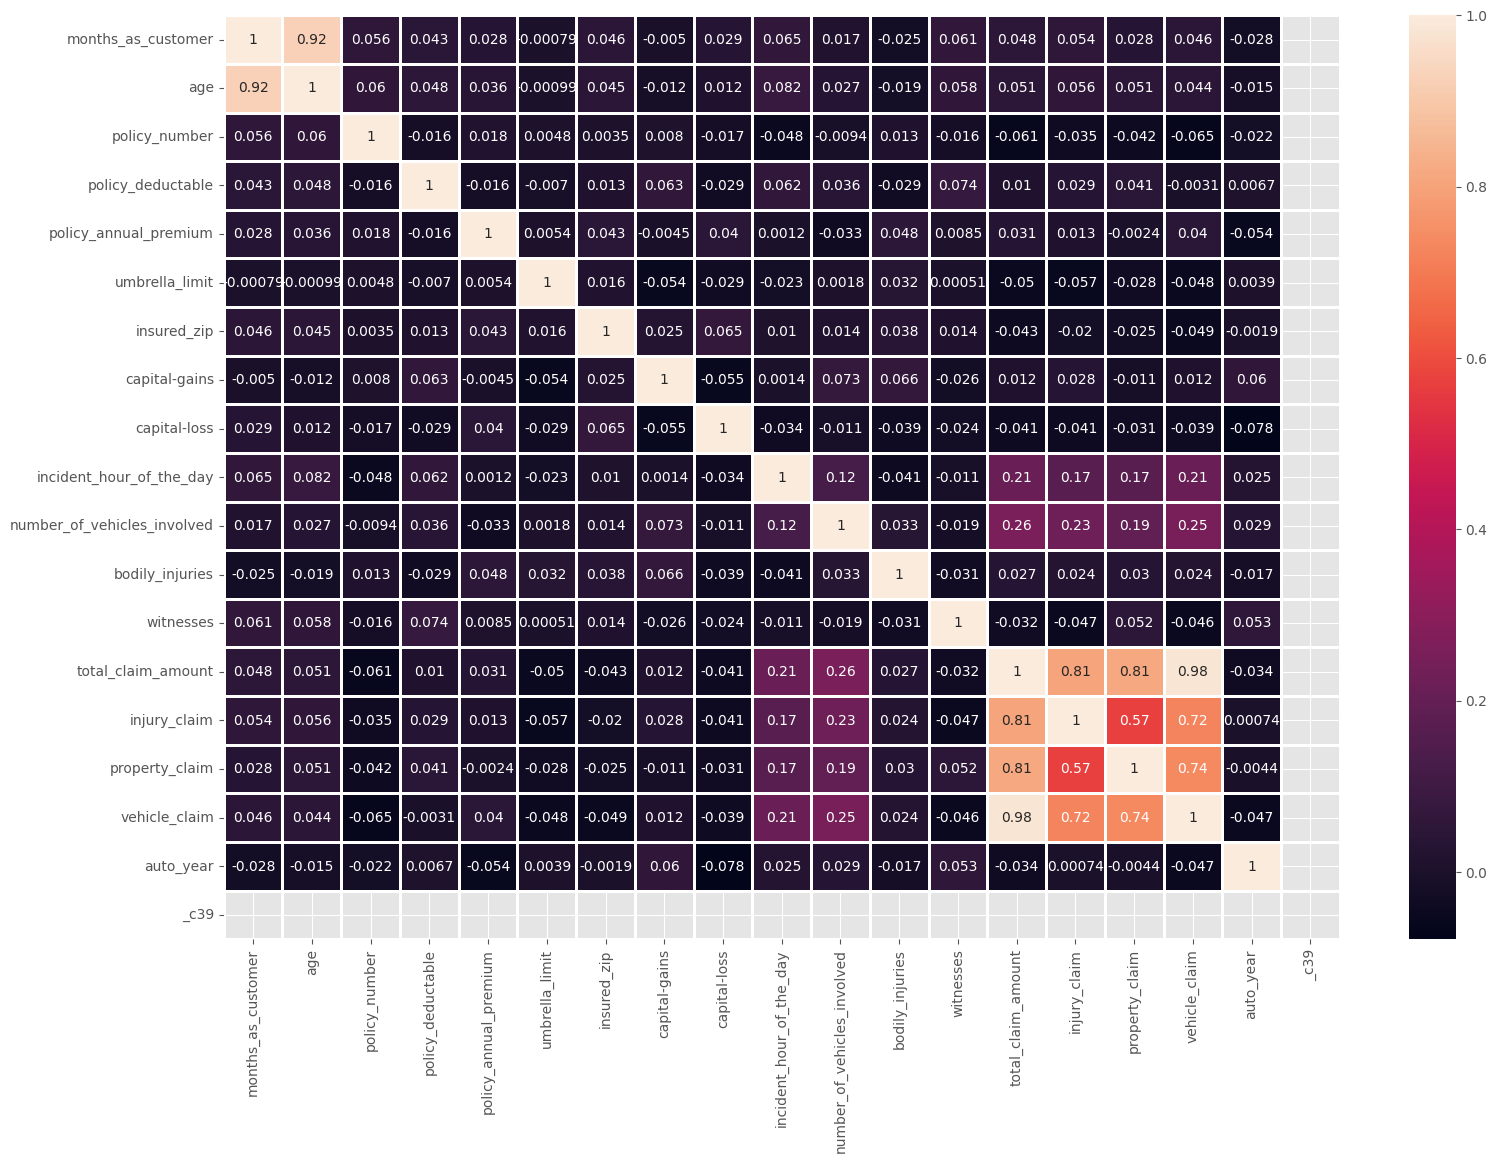

In [42]:
# heatmap
plt.figure(figsize=(18, 12))
corr = df.corr(numeric_only=True) # only float, int or boolean columns
sns.heatmap(corr, annot=True, fmt='.2g', linewidth = 1)
plt.show()

In [43]:
df.nunique()

months_as_customer             365
age                             46
policy_number                  800
policy_bind_date               767
policy_state                     3
policy_csl                       3
policy_deductable                3
policy_annual_premium          791
umbrella_limit                  11
insured_zip                    797
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  286
capital-loss                   309
incident_date                   60
incident_type                    4
collision_type                   3
incident_severity                4
authorities_contacted            4
incident_state                   7
incident_city                    7
incident_location              800
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  2
bodily_injuries     

In [44]:
# drop columns that are not needed for analysis

to_drop = ['policy_number','policy_bind_date','policy_state',
           'insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies',
           'auto_make','auto_model','auto_year', '_c39']
df.drop(to_drop, inplace=True, axis=1)

In [45]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,241,45,500/1000,2000,1104.50,0,FEMALE,PhD,machine-op-inspct,unmarried,...,1,NO,2,2,NO,91650,14100,14100,63450,N
1,65,23,250/500,1000,1099.95,0,FEMALE,College,sales,wife,...,1,NO,1,0,YES,52400,6550,6550,39300,Y
2,289,45,250/500,2000,1221.41,0,FEMALE,Masters,farming-fishing,wife,...,1,NO,2,1,NO,2700,300,300,2100,N
3,63,26,500/1000,500,1500.04,6000000,MALE,PhD,craft-repair,own-child,...,1,NO,0,2,YES,5160,860,860,3440,N
4,257,43,100/300,1000,974.84,0,FEMALE,JD,transport-moving,other-relative,...,1,NO,0,1,YES,85320,21330,7110,56880,N


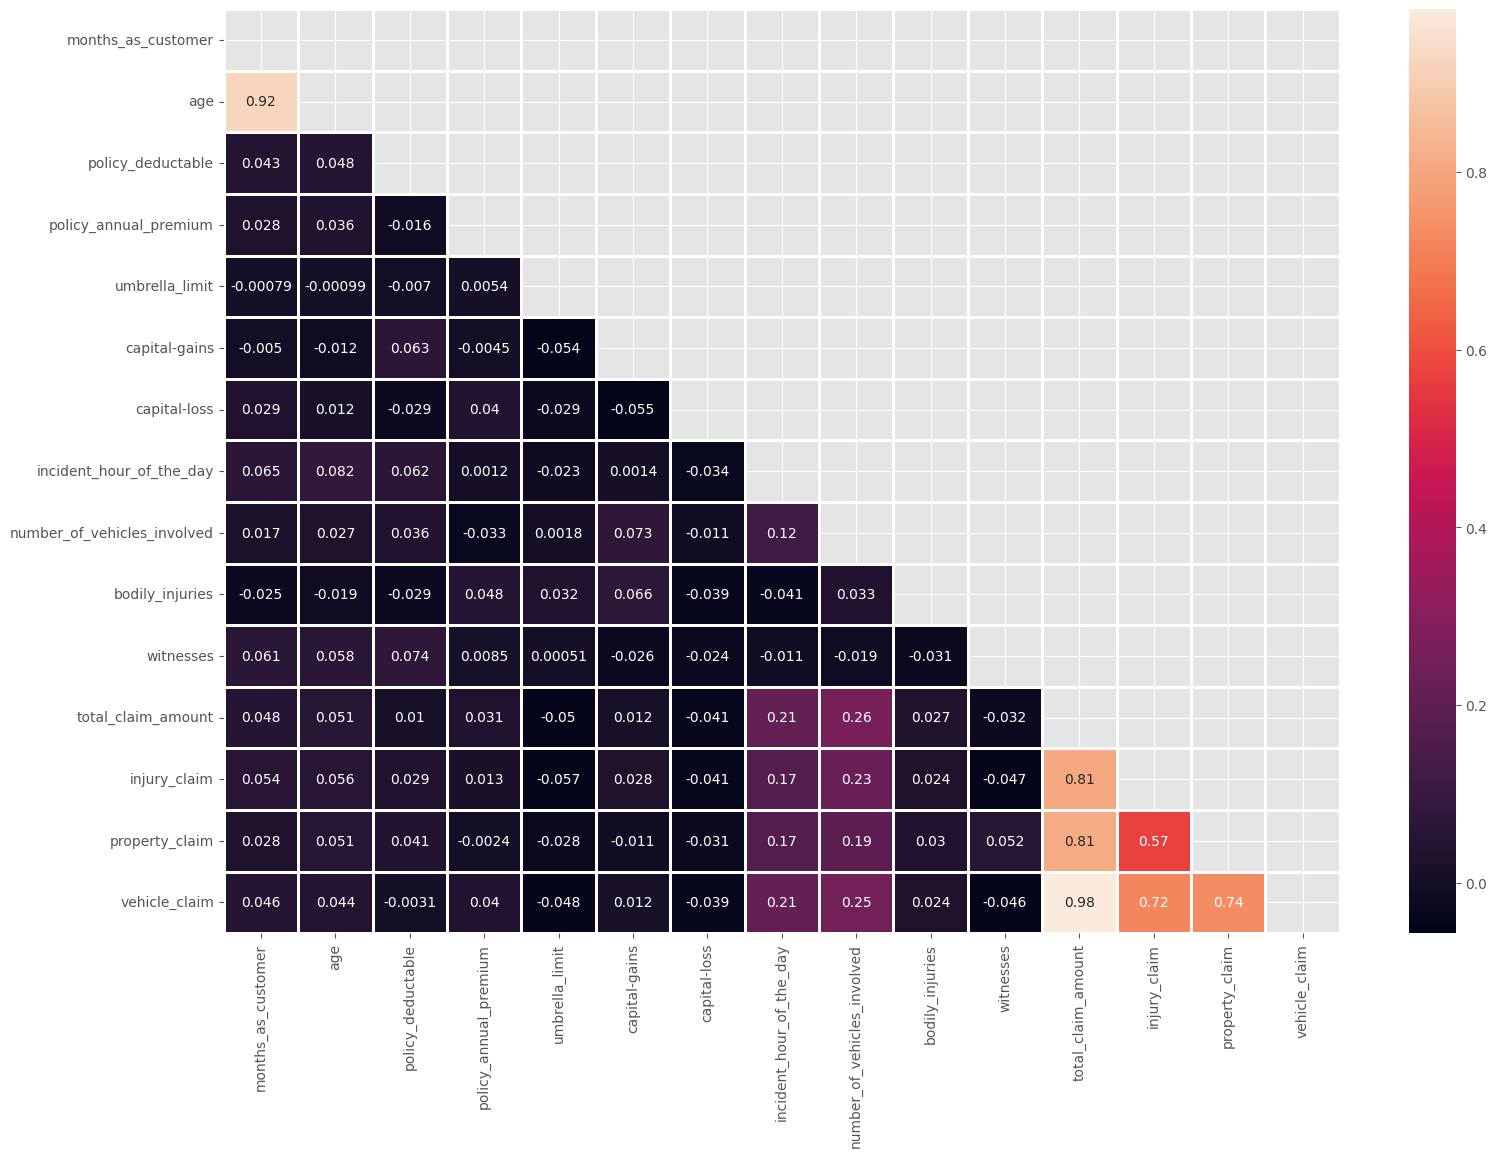

In [46]:
# checking for multicollinearity

plt.figure(figsize=(18, 12))
corr = df.corr(numeric_only=True) # only float, int or boolean columns
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2g', linewidth=1)
plt.show()

From the plot, we can see high correlation:
- between `age` and `months_as_customer`, we drop `age`
- between the claim variables, we drop `total_claim_amount`

In [47]:
df.drop(columns=['age', 'total_claim_amount'], inplace=True, axis=1)
df.head() 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           800 non-null    int64  
 1   policy_csl                   800 non-null    object 
 2   policy_deductable            800 non-null    int64  
 3   policy_annual_premium        800 non-null    float64
 4   umbrella_limit               800 non-null    int64  
 5   insured_sex                  800 non-null    object 
 6   insured_education_level      800 non-null    object 
 7   insured_occupation           800 non-null    object 
 8   insured_relationship         800 non-null    object 
 9   capital-gains                800 non-null    int64  
 10  capital-loss                 800 non-null    int64  
 11  incident_type                800 non-null    object 
 12  collision_type               800 non-null    object 
 13  incident_severity   

In [48]:
# separating the features and target variable
X = df.drop(columns=['fraud_reported'], axis=1)
y = df['fraud_reported']

### Encoding Categorical Features
- Since the categorical features are of the 'object' dtype, select them using `.select_dtypes(include=['object'])` 
- Convert each into two or more 'boo' type features, using `pd.get_dummies(cat_df, drop_first=True)`, object(11) -> bool(40)
- Combine the converted features with existing numerical features to form the new data of features `X`. Note: the author keeps only the 12 int variables, while I include the float variable 'policy_annual_premium'. 

In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           800 non-null    int64  
 1   policy_csl                   800 non-null    object 
 2   policy_deductable            800 non-null    int64  
 3   policy_annual_premium        800 non-null    float64
 4   umbrella_limit               800 non-null    int64  
 5   insured_sex                  800 non-null    object 
 6   insured_education_level      800 non-null    object 
 7   insured_occupation           800 non-null    object 
 8   insured_relationship         800 non-null    object 
 9   capital-gains                800 non-null    int64  
 10  capital-loss                 800 non-null    int64  
 11  incident_type                800 non-null    object 
 12  collision_type               800 non-null    object 
 13  incident_severity   

In [50]:
# Select categorical features, i.e. dtypes 'object'
cat_df = X.select_dtypes(include=['object'])
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   policy_csl               800 non-null    object
 1   insured_sex              800 non-null    object
 2   insured_education_level  800 non-null    object
 3   insured_occupation       800 non-null    object
 4   insured_relationship     800 non-null    object
 5   incident_type            800 non-null    object
 6   collision_type           800 non-null    object
 7   incident_severity        800 non-null    object
 8   authorities_contacted    800 non-null    object
 9   property_damage          800 non-null    object
 10  police_report_available  800 non-null    object
dtypes: object(11)
memory usage: 68.9+ KB


In [51]:
# Print unique values in each categorical column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

policy_csl: 
['500/1000' '250/500' '100/300']

insured_sex: 
['FEMALE' 'MALE']

insured_education_level: 
['PhD' 'College' 'Masters' 'JD' 'MD' 'Associate' 'High School']

insured_occupation: 
['machine-op-inspct' 'sales' 'farming-fishing' 'craft-repair'
 'transport-moving' 'prof-specialty' 'armed-forces' 'exec-managerial'
 'adm-clerical' 'priv-house-serv' 'handlers-cleaners' 'protective-serv'
 'tech-support' 'other-service']

insured_relationship: 
['unmarried' 'wife' 'own-child' 'other-relative' 'not-in-family' 'husband']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Parked Car'
 'Multi-vehicle Collision']

collision_type: 
['Rear Collision' 'Side Collision' 'Front Collision']

incident_severity: 
['Minor Damage' 'Major Damage' 'Trivial Damage' 'Total Loss']

authorities_contacted: 
['Police' 'Other' 'Ambulance' 'Fire']

property_damage: 
['NO' 'YES']

police_report_available: 
['NO' 'YES']



In [52]:
# Convert each categorical variable into as many 0/1 variables as there are unique values minus 1.
cat_df = pd.get_dummies(cat_df, drop_first = True)
cat_df.info() # now we have 40 bool columns, the author got 41 bool because his authorities_contacted has also 'None'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 40 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   policy_csl_250/500                      800 non-null    bool 
 1   policy_csl_500/1000                     800 non-null    bool 
 2   insured_sex_MALE                        800 non-null    bool 
 3   insured_education_level_College         800 non-null    bool 
 4   insured_education_level_High School     800 non-null    bool 
 5   insured_education_level_JD              800 non-null    bool 
 6   insured_education_level_MD              800 non-null    bool 
 7   insured_education_level_Masters         800 non-null    bool 
 8   insured_education_level_PhD             800 non-null    bool 
 9   insured_occupation_armed-forces         800 non-null    bool 
 10  insured_occupation_craft-repair         800 non-null    bool 
 11  insured_occupation_

In [53]:
# Extract the numerical features
num_df = X.select_dtypes(include = ['float64','int64'])
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           800 non-null    int64  
 1   policy_deductable            800 non-null    int64  
 2   policy_annual_premium        800 non-null    float64
 3   umbrella_limit               800 non-null    int64  
 4   capital-gains                800 non-null    int64  
 5   capital-loss                 800 non-null    int64  
 6   incident_hour_of_the_day     800 non-null    int64  
 7   number_of_vehicles_involved  800 non-null    int64  
 8   bodily_injuries              800 non-null    int64  
 9   witnesses                    800 non-null    int64  
 10  injury_claim                 800 non-null    int64  
 11  property_claim               800 non-null    int64  
 12  vehicle_claim                800 non-null    int64  
dtypes: float64(1), int64

In [54]:
# Combine the one-hot encoded categorical features with numerical features
X = pd.concat([num_df, cat_df], axis=1)
X.head() # 53 columns =  40 bool + 12 int64 + 1 float64 

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,241,2000,1104.50,0,0,0,5,1,2,2,...,True,False,True,False,False,False,False,True,False,False
1,65,1000,1099.95,0,0,-71900,14,1,1,0,...,False,True,False,False,False,False,True,False,False,True
2,289,2000,1221.41,0,46700,-72500,9,1,2,1,...,True,False,False,False,True,False,False,True,False,False
3,63,500,1500.04,6000000,0,-36500,5,1,0,2,...,True,False,True,False,False,False,False,True,False,True
4,257,1000,974.84,0,52100,0,0,1,0,1,...,True,False,False,True,False,False,False,True,False,True


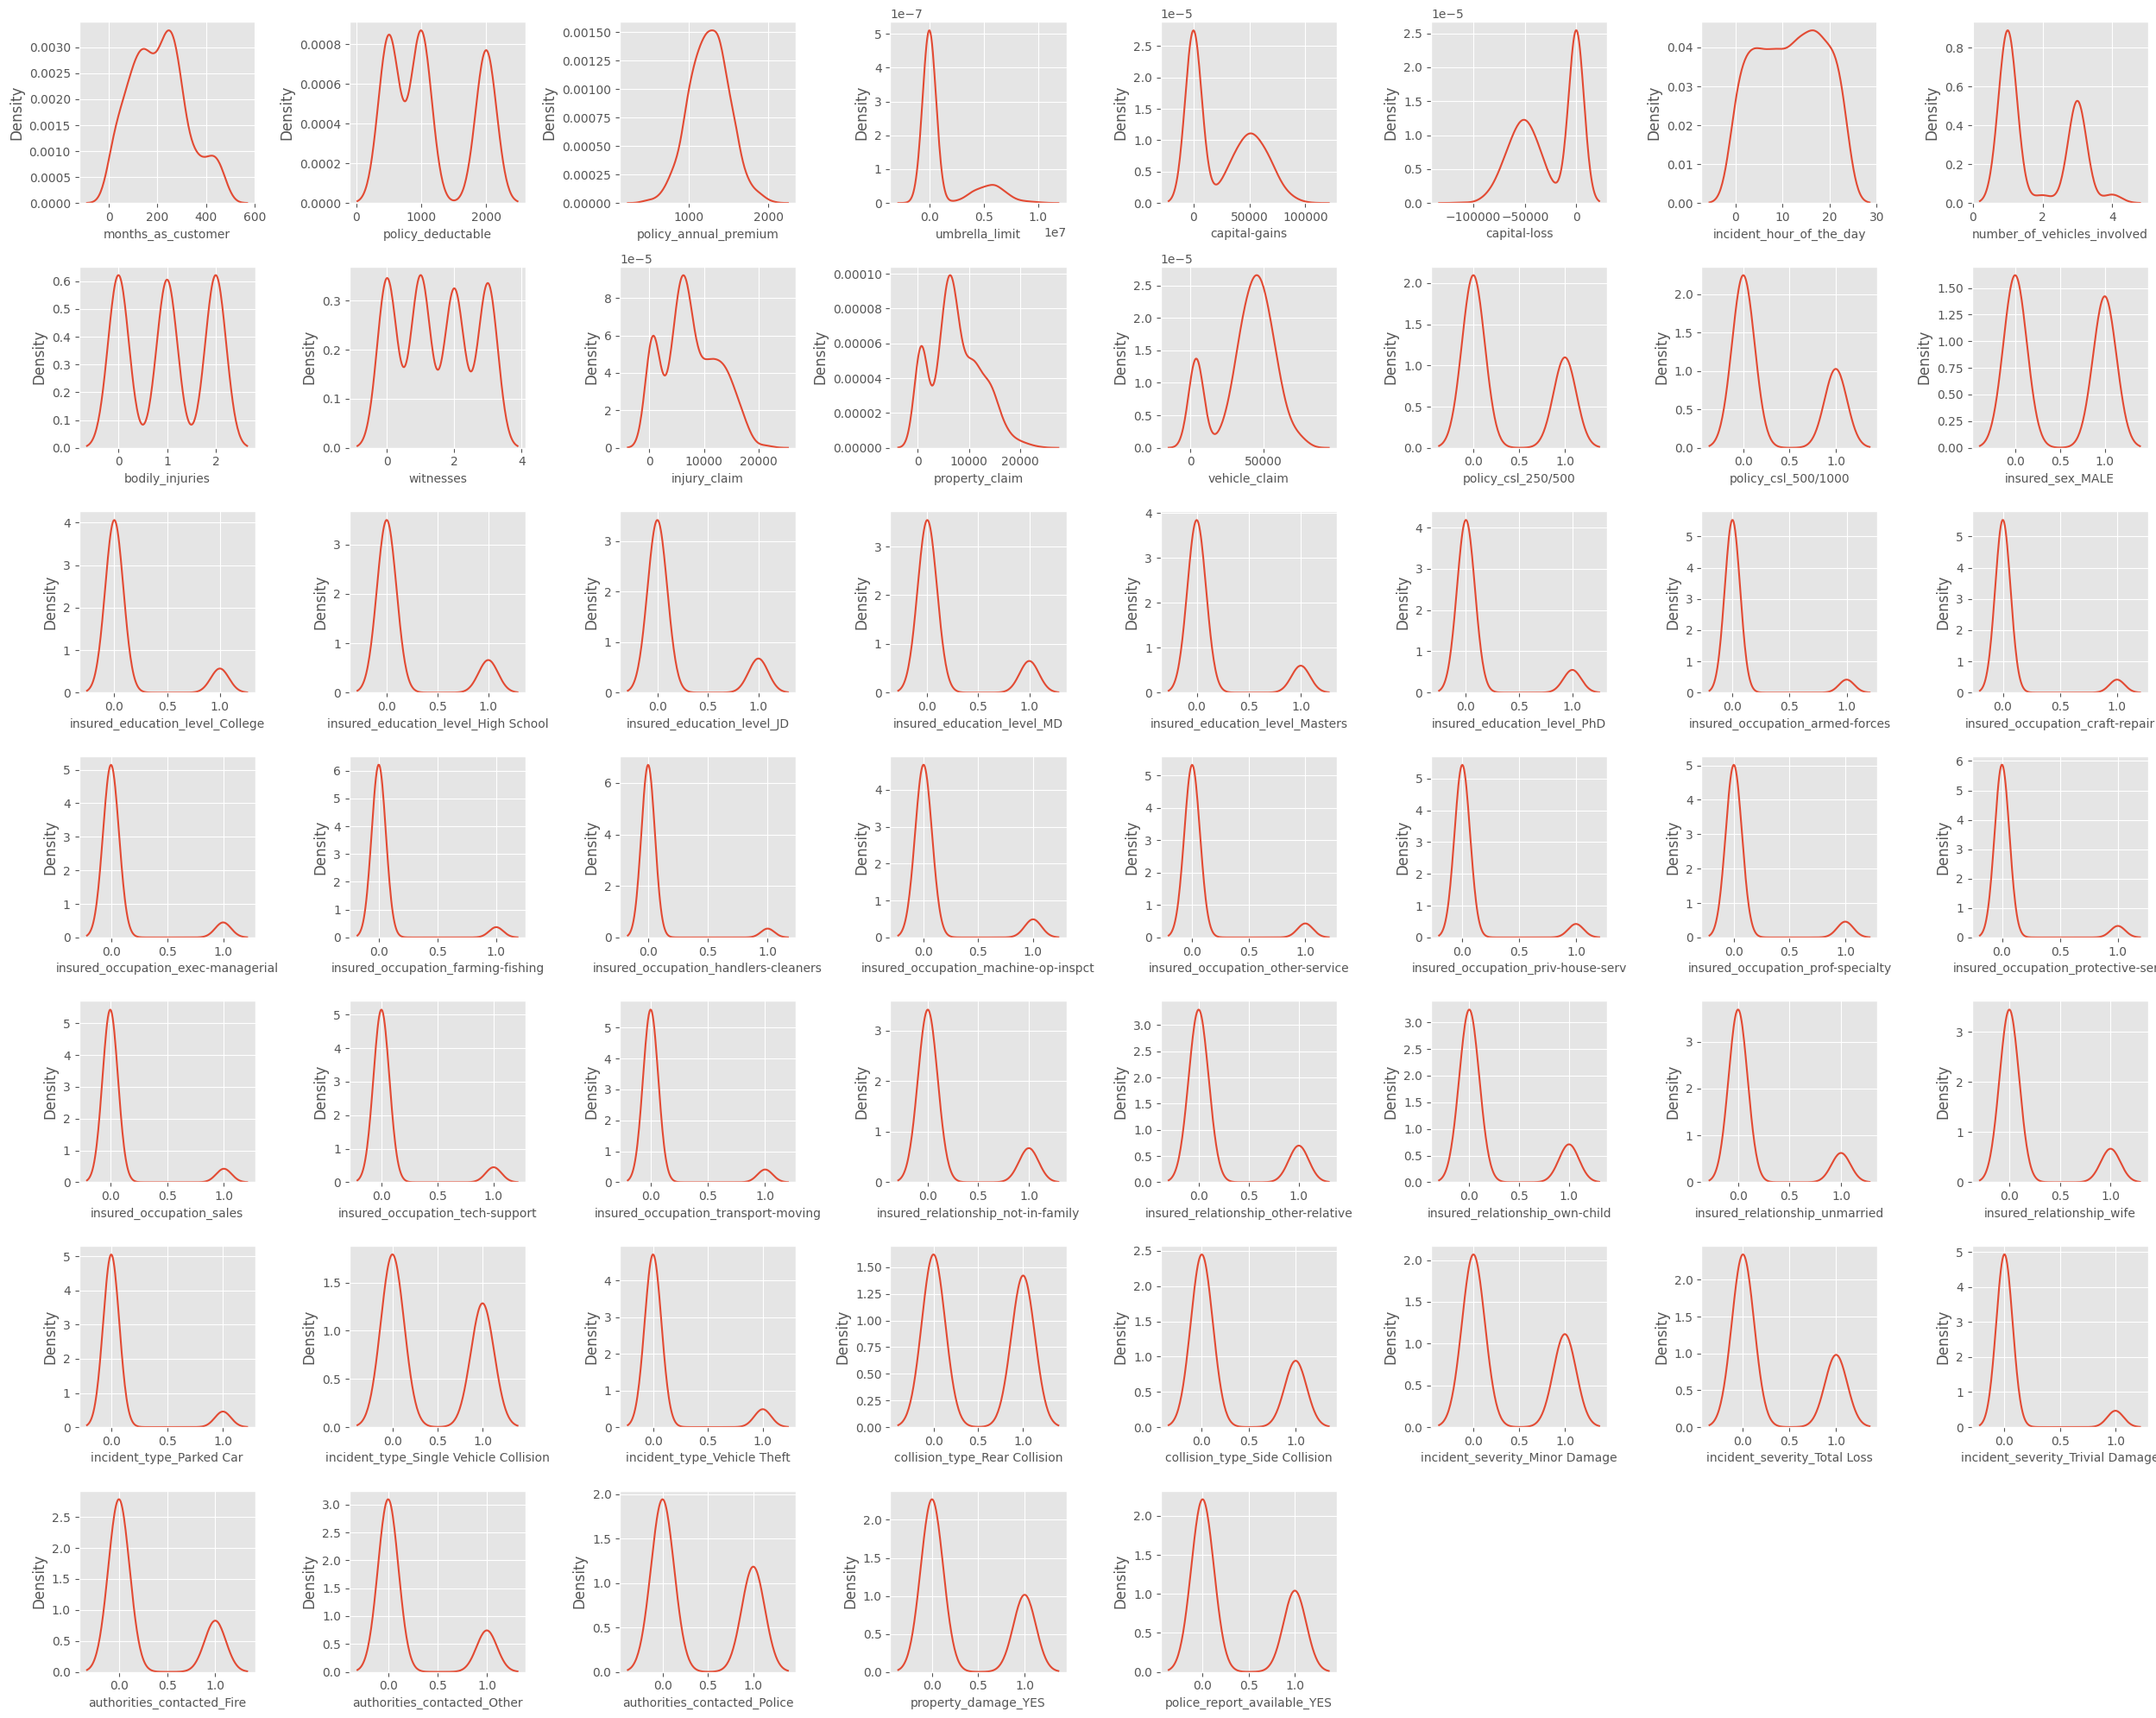

In [55]:
# density plot of each feature
plt.figure(figsize=(25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 53: # 53 features
        ax = plt.subplot(7, 8, plotnumber) # 7 rows, 8 columns
        sns.kdeplot(X[col], ax=ax) 
        plt.xlabel(col, fontsize=10)
    plotnumber += 1 

plt.tight_layout()
plt.show()

### Outliers Detection
- See if the numerical features have outliers.

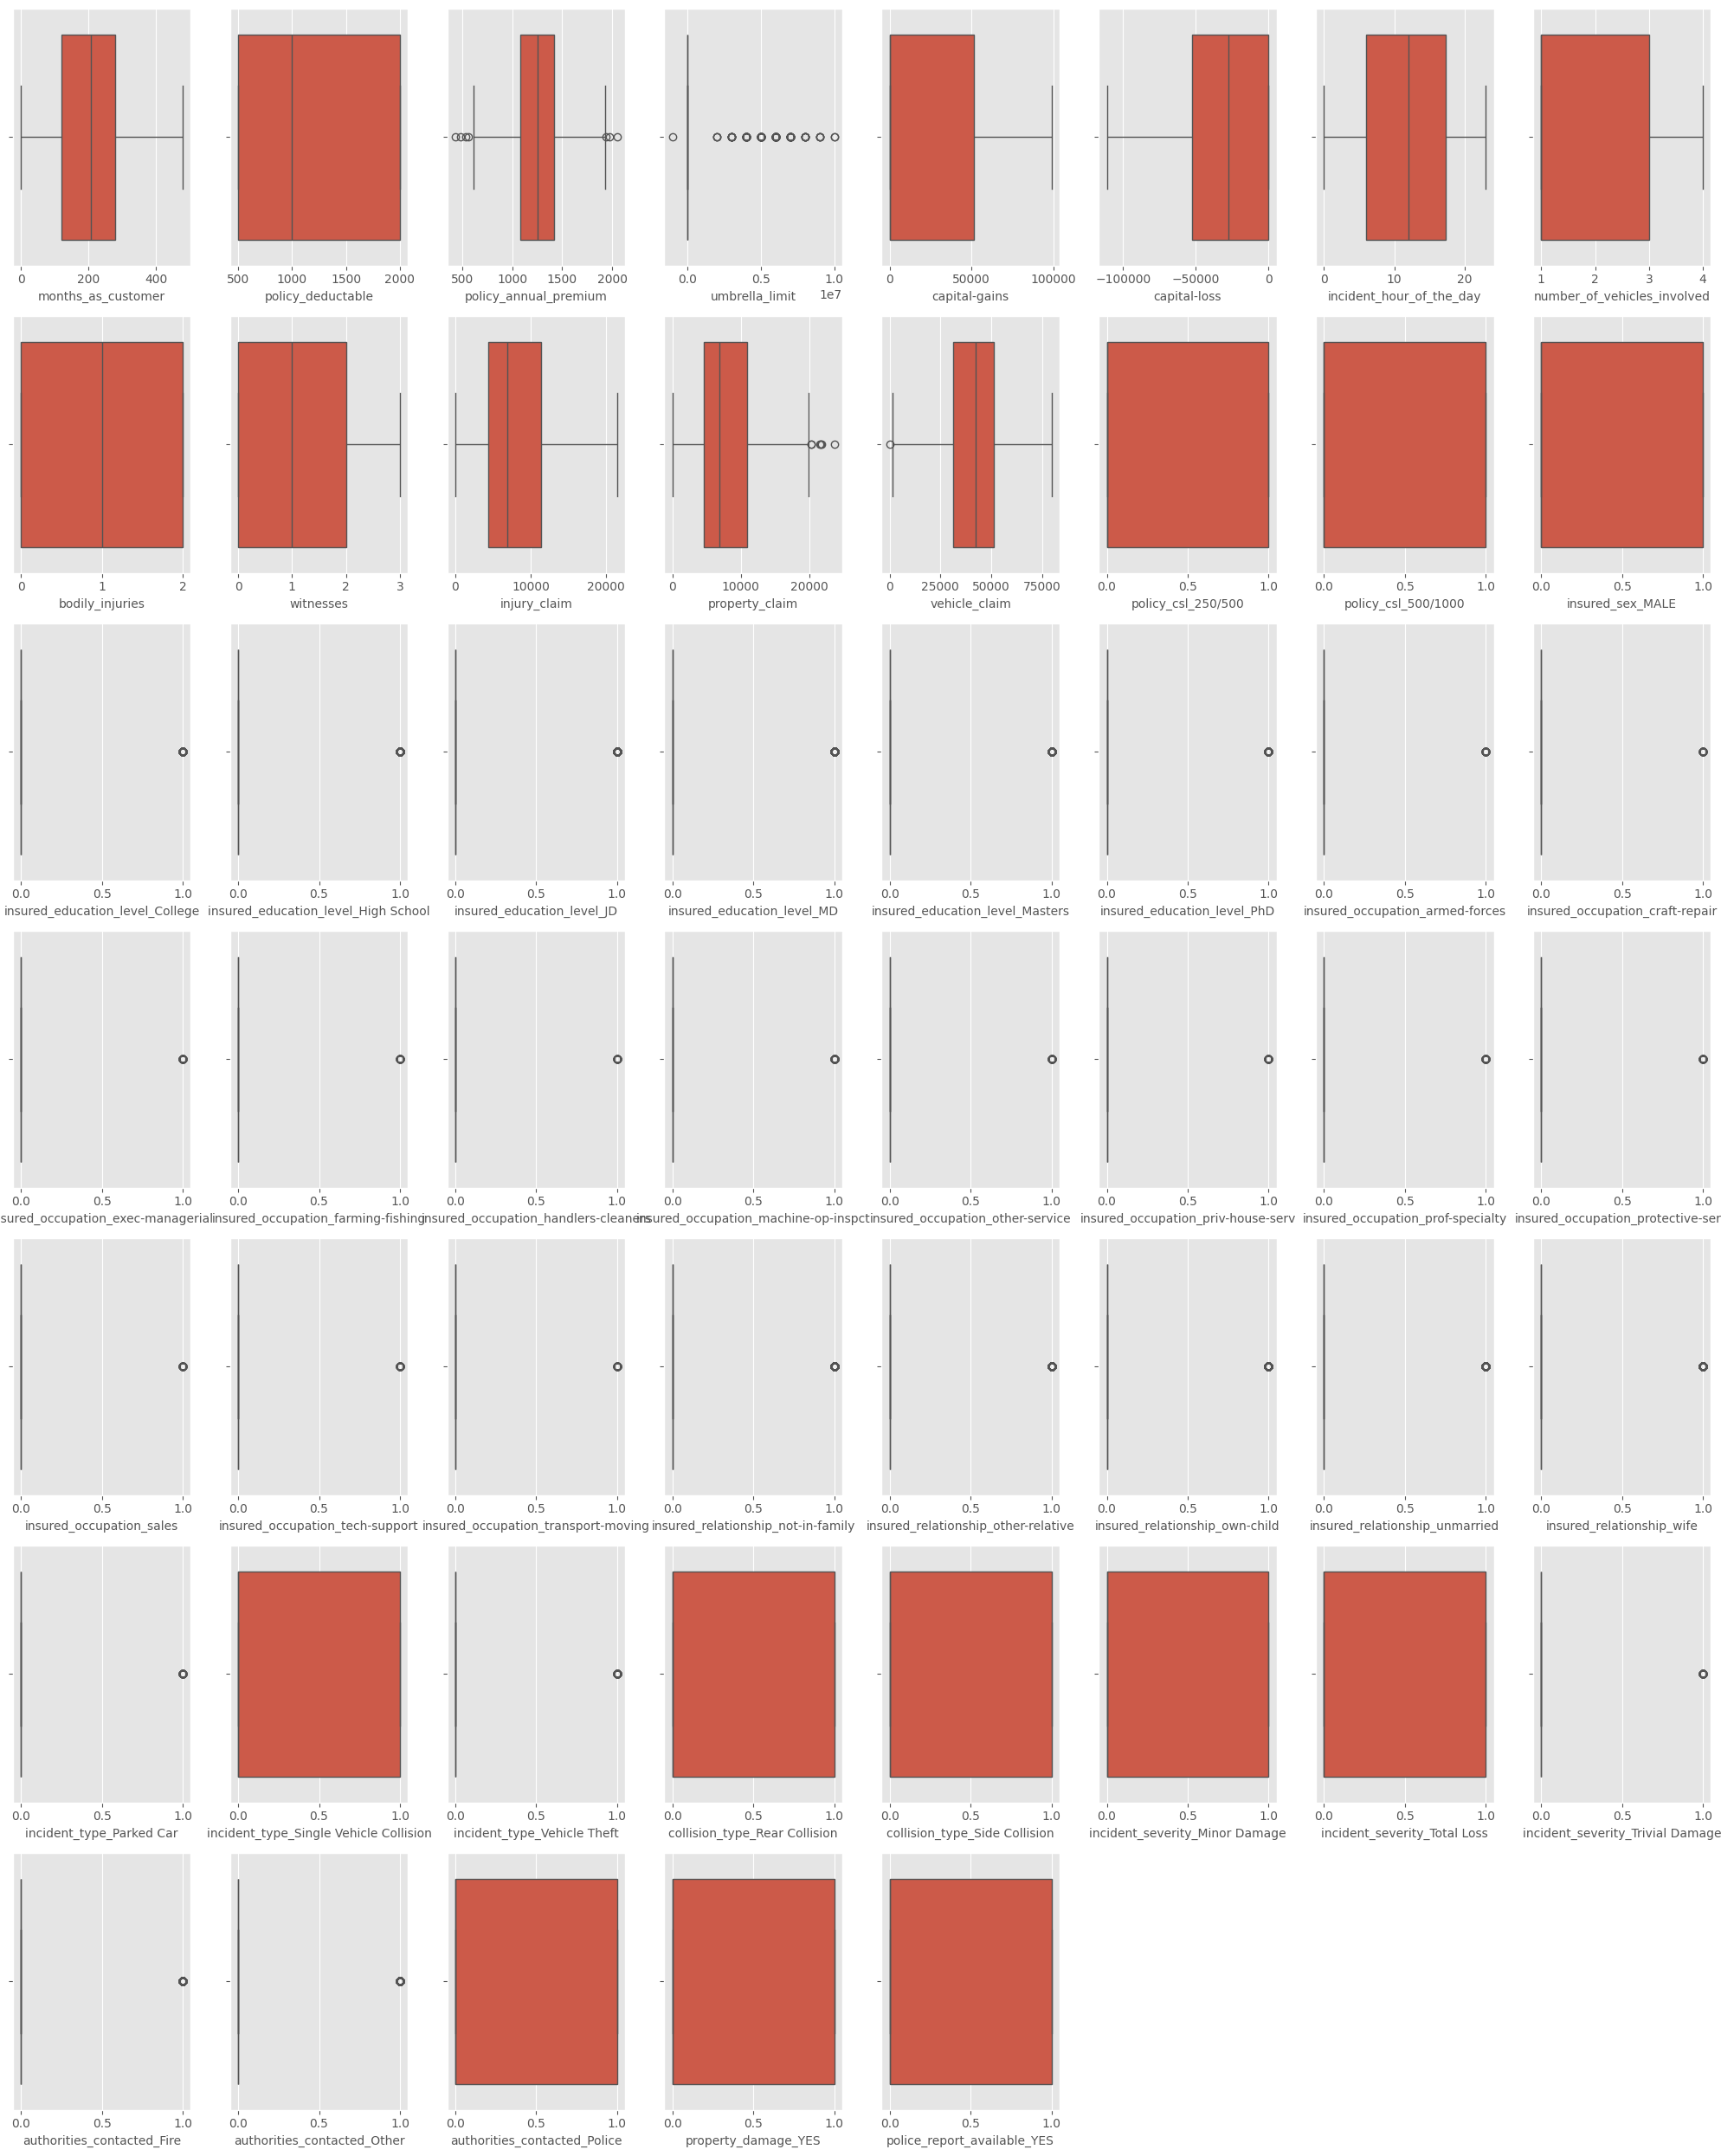

In [56]:
# Make boxplots of each feature
plt.figure(figsize=(20, 25))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 53: # 53 features
        ax = plt.subplot(7, 8, plotnumber) # 7 rows, 8 columns
        sns.boxplot(x=X[col], ax=ax)
        plt.xlabel(col, fontsize=10)
    plotnumber += 1

plt.tight_layout()
plt.show()

### Split the data into training set and test set (come back to split test to test & validation)
- Split the data: data used for training is 640, for testing is 160 
- Scale the numerical features
  - for X_train, use `.fit_transform()`
  - for X_test, use `.transform()` the same scaler from training

Get ready for training 12 models.

In [57]:
# # Install sklearn if not already installed
# !pip install scikit-learn

In [58]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42) # ensure reproducibility
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 640 entries, 264 to 102
Data columns (total 53 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   months_as_customer                      640 non-null    int64  
 1   policy_deductable                       640 non-null    int64  
 2   policy_annual_premium                   640 non-null    float64
 3   umbrella_limit                          640 non-null    int64  
 4   capital-gains                           640 non-null    int64  
 5   capital-loss                            640 non-null    int64  
 6   incident_hour_of_the_day                640 non-null    int64  
 7   number_of_vehicles_involved             640 non-null    int64  
 8   bodily_injuries                         640 non-null    int64  
 9   witnesses                               640 non-null    int64  
 10  injury_claim                            640 non-null    int64  
 

In [59]:
# Scale the numerical features in X_train
num_df = X_train.select_dtypes(include=['float64', 'int64']) # 13 numerical features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
264,-1.361577,-1.069551,-0.653914,-0.490147,-0.913376,-0.804074,-1.540399,-0.798690,-1.185478,0.467453,0.412846,-0.581586,-0.277439
615,0.727177,-0.258517,0.544544,-0.490147,-0.913376,1.024716,1.005569,1.163543,0.026512,1.363173,-0.006434,-0.012328,0.757471
329,0.120485,-0.258517,0.930252,-0.490147,2.296337,0.278857,-1.257514,1.163543,0.026512,-0.428266,-0.358547,0.839512,0.739921
342,-0.919558,-0.258517,-0.782108,0.773051,-0.913376,1.024716,0.722684,-0.798690,0.026512,-0.428266,-0.627212,-0.636874,-0.377952
394,0.241824,-0.258517,-1.201214,-0.490147,-0.913376,1.024716,0.722684,1.163543,1.238503,1.363173,0.172676,-0.702400,-0.497078


In [60]:
# Drop the original numerical features and replace them with the scaled ones
X_train.drop(columns=num_df.columns, inplace=True)
X_train = pd.concat([scaled_num_df, X_train], axis=1)
X_train.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
264,-1.361577,-1.069551,-0.653914,-0.490147,-0.913376,-0.804074,-1.540399,-0.798690,-1.185478,0.467453,...,True,False,False,False,False,False,False,False,True,False
615,0.727177,-0.258517,0.544544,-0.490147,-0.913376,1.024716,1.005569,1.163543,0.026512,1.363173,...,False,True,True,False,False,True,False,False,True,False
329,0.120485,-0.258517,0.930252,-0.490147,2.296337,0.278857,-1.257514,1.163543,0.026512,-0.428266,...,False,False,False,False,False,False,False,False,False,False
342,-0.919558,-0.258517,-0.782108,0.773051,-0.913376,1.024716,0.722684,-0.798690,0.026512,-0.428266,...,False,False,False,True,False,True,False,False,True,False
394,0.241824,-0.258517,-1.201214,-0.490147,-0.913376,1.024716,0.722684,1.163543,1.238503,1.363173,...,False,True,True,False,False,False,True,False,False,True


In [61]:
# Scale the numerical features in X_test
num_df_test = X_test.select_dtypes(include=['float64', 'int64']) 
scaled_data_test = scaler.transform(num_df_test) 
scaled_num_df_test = pd.DataFrame(data = scaled_data_test, columns= num_df_test.columns, index = X_test.index)

X_test.drop(columns=num_df_test.columns, inplace=True)
X_test = pd.concat([scaled_num_df_test, X_test], axis=1)

X_test.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
696,0.536503,-1.069551,0.194732,-0.490147,0.820647,1.024716,-1.681842,-0.798690,0.026512,1.363173,...,True,False,True,False,False,False,False,True,False,True
667,1.039190,-1.069551,0.388714,-0.490147,0.725099,-1.754328,1.288455,1.163543,0.026512,0.467453,...,True,False,True,False,False,True,False,False,False,True
63,0.354495,-0.258517,1.664282,-0.490147,0.303979,-0.162204,-0.408858,1.163543,1.238503,0.467453,...,False,True,False,False,False,True,False,False,False,False
533,-0.148193,-1.069551,0.825345,-0.490147,0.725099,1.024716,-0.833186,-0.798690,1.238503,-1.323985,...,True,False,False,True,False,False,False,False,False,True
66,-1.378911,1.363551,1.273578,1.194116,0.742793,1.024716,-0.691743,-0.798690,1.238503,-1.323985,...,False,True,False,False,False,True,False,False,False,False


## Models
In this section, we train 12 models for prediction of fraud (y) given the features (X).

### Evaluation Metrics to Use
- **Recall for fraud** - of the true fraud cases, how many did we successfully identified?
- **F1-scor for fraud** - harmonic mean of recall and precision (of the predicted fraud, how many of them were truely fraud)

In [65]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### Accuracy

`accuracy_score()` computes **classification accuracy** = (Number of Correct Predictions) / (Total Number of Predictions):
  - in (0, 1.0), higher is better
  - **misleading with imbalanced classes**, for fraud detection (when fraud is rare), a model predicting "no fraud" for every case might get a hight accuracy score but misses all fraud cases

#### Confusion matrix

`confusion_matrix` shows the number of cases, here show far more "no fraud" than "fraud"  

|              | **Predicted N** | **Predicted Y** | **Total** |
|--------------|-----------------|-----------------|-----------|
| **Actual N** | 85              | 5               | 90        |
| **Actual Y** | 10              | 15              | 25        |
| **Total**    | 95              | 20              | 115       |

Key insights:
- **True Negatives (TN)**  85: Correctly identified non-fraud cases 
- **False Positives (FP)** 5: Incorrectly flagged as fraud (false alarms) 
- **False Negatives (FN)** 10: Missed fraud cases ⚠️ (most costly error!) 
- **True Positives (TP)** 15: Correctly identified fraud cases ✓ 



#### Report of the Key Classification Metrics

`classification_report()`: calculates Metrics:
- **accuracy**: (85+15)/115 = 87.0%
- **precision (for fraud)**: 15/(15+5) = 75.0%, of predicted fraud, how many were actually fraud? 
- **precision (for not fraud)**: of predicted not fraud, how many were actually not fraud? 85/95 = 89%
- **recall (for fraud)**: 15/(15+10) = 60.0%, of actual fraud cases, how many did we catch?
- **recall (for not fraud)**: of actual not fraud cases, how many did we catch? 85/90 = 94%
- **f1-score**: the **harmonic mean** of **precision** and **recall** for the fraud and not-fraud classes 
  - f1 (for fraud) = $2 \times$ [precision (for fraud) $\times$ recall (for fraud)] / [precision (for fraud) + recall (for fraud)]
  - why it matters? - give more weight to the lower value, hence more conservative than arithmetic mean
  - single metric to compare models
  - in (0.0, 1.0), higher is better
- **macro avg**: *simple average* of the precision (or recall, or f1-score) values over the fraud and not-fraud classes; it treats each class equally, does not let the majority class dominate; for fraud detection, it is more informative.
- **support**: number of cases in each class
- **weighted avg**: weighted by class frequency, giving more weight to larger classes.

### Suport Vector Classifier (Y_recall = 0.04, Y_f1-score = 0.07, very low)

In [37]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")

# prediction performance metrics for the test set
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

Training accuracy of Support Vector Classifier is : 0.8484375
Test accuracy of Support Vector Classifier is : 0.73125
[[116   0]
 [ 43   1]]
              precision    recall  f1-score   support

           N       0.73      1.00      0.84       116
           Y       1.00      0.02      0.04        44

    accuracy                           0.73       160
   macro avg       0.86      0.51      0.44       160
weighted avg       0.80      0.73      0.62       160



### KNN (Y_recall = 0.00, Y_f1-score = 0.00, very low)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of KNN is : 0.76875
Test accuracy of KNN is : 0.725
[[116   0]
 [ 44   0]]
              precision    recall  f1-score   support

           N       0.72      1.00      0.84       116
           Y       0.00      0.00      0.00        44

    accuracy                           0.72       160
   macro avg       0.36      0.50      0.42       160
weighted avg       0.53      0.72      0.61       160



### Decision Tree Classifier (Y_recall = 0.70, Y_f1-score = 0.69, very good! )
1. initial training
2. hyper parameter tuning to get best model and best parameters 

In [66]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.69375
[[98 18]
 [31 13]]
              precision    recall  f1-score   support

           N       0.76      0.84      0.80       116
           Y       0.42      0.30      0.35        44

    accuracy                           0.69       160
   macro avg       0.59      0.57      0.57       160
weighted avg       0.67      0.69      0.68       160



In [67]:
# hyper parameter tuning

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...], 'min_samples_leaf': range(2, 10), 'min_samples_split': range(2, 10)}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [68]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 2}
0.8140625


In [69]:
# best estimator and its performance on the test set

dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)
dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 0.8171875
Test accuracy of Decision Tree is : 0.825
[[101  15]
 [ 13  31]]
              precision    recall  f1-score   support

           N       0.89      0.87      0.88       116
           Y       0.67      0.70      0.69        44

    accuracy                           0.82       160
   macro avg       0.78      0.79      0.78       160
weighted avg       0.83      0.82      0.83       160



### Radom Forest Classifier (Y_recall = 0.11, Y_f1-score = 0.20, vary around these values)

In [43]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest is : 0.984375
Test accuracy of Random Forest is : 0.75625
[[115   1]
 [ 38   6]]
              precision    recall  f1-score   support

           N       0.75      0.99      0.86       116
           Y       0.86      0.14      0.24        44

    accuracy                           0.76       160
   macro avg       0.80      0.56      0.55       160
weighted avg       0.78      0.76      0.68       160



### Ada Boost Classifier (Y_recall = 0.70, Y_f1-score = 0.69, very good!)

In [70]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(estimator = dtc)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


,estimator,AdaBoostClass...mples_leaf=6))
,param_grid,"{'algorithm': ['SAMME', 'SAMME.R'], 'learning_rate': [0.001, 0.01, ...], 'n_estimators': [50, 70, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [71]:
# best parameter and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 50}
0.8140625


In [72]:
# best estimator and its performance on the test set

ada = grid_search.best_estimator_

y_pred = ada.predict(X_test)

ada_train_acc = accuracy_score(y_train, ada.predict(X_train))
ada_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Ada Boost is : {ada_train_acc}")
print(f"Test accuracy of Ada Boost is : {ada_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Ada Boost is : 0.8171875
Test accuracy of Ada Boost is : 0.825
[[101  15]
 [ 13  31]]
              precision    recall  f1-score   support

           N       0.89      0.87      0.88       116
           Y       0.67      0.70      0.69        44

    accuracy                           0.82       160
   macro avg       0.78      0.79      0.78       160
weighted avg       0.83      0.82      0.83       160



### Gradient Boosting Classifier (Y_recall = 0.41, Y_f1-score = 0.52, vary)

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)


gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 0.9578125
Test Accuracy of Gradient Boosting Classifier is 0.79375 

Confusion Matrix :- 
[[109   7]
 [ 26  18]]

Classification Report :- 
               precision    recall  f1-score   support

           N       0.81      0.94      0.87       116
           Y       0.72      0.41      0.52        44

    accuracy                           0.79       160
   macro avg       0.76      0.67      0.70       160
weighted avg       0.78      0.79      0.77       160



### Stochastic Gradient Boosting (Y_recall = 0.41, Y_f1-score = 0.55, vary)

In [48]:
sgb = GradientBoostingClassifier(subsample = 0.90, max_features = 0.70)
sgb.fit(X_train, y_train)


sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")

Training Accuracy of Stochastic Gradient Boosting is 0.95625
Test Accuracy of Stochastic Gradient Boosting is 0.7875 

Confusion Matrix :- 
[[110   6]
 [ 28  16]]

Classification Report :- 
               precision    recall  f1-score   support

           N       0.80      0.95      0.87       116
           Y       0.73      0.36      0.48        44

    accuracy                           0.79       160
   macro avg       0.76      0.66      0.68       160
weighted avg       0.78      0.79      0.76       160



### XgBoost Classifier (Y_recall = 0.70, Y_f1-score = 0.69, very good!)

In [73]:
#!pip install xgboost
from xgboost import XGBClassifier

# Encode target variable: 'N' -> 0, 'Y' -> 1
y_train_encoded = y_train.map({'N': 0, 'Y': 1})
y_test_encoded = y_test.map({'N': 0, 'Y': 1})

xgb = XGBClassifier()
xgb.fit(X_train, y_train_encoded)

y_pred = xgb.predict(X_test)

In [74]:
xgb_train_acc = accuracy_score(y_train_encoded, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test_encoded, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(confusion_matrix(y_test_encoded, y_pred))
print(classification_report(y_test_encoded, y_pred))

Training accuracy of XgBoost is : 1.0
Test accuracy of XgBoost is : 0.78125
[[107   9]
 [ 26  18]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       116
           1       0.67      0.41      0.51        44

    accuracy                           0.78       160
   macro avg       0.74      0.67      0.68       160
weighted avg       0.77      0.78      0.76       160



In [75]:
param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 10, 1)}

grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)
grid.fit(X_train, y_train_encoded)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END criterion=gini, max_depth=2, n_estimators=10;, score=0.750 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=2, n_estimators=10;, score=0.758 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=2, n_estimators=10;, score=0.797 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=2, n_estimators=10;, score=0.781 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=2, n_estimators=10;, score=0.781 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=2, n_estimators=50;, score=0.766 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=2, n_estimators=50;, score=0.750 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=2, n_estimators=50;, score=0.805 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=2, n_estimators=50;, score=0.805 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=2, n_estimators=50;, score=0.828 total time=   0.1s
[CV 1/5] END criterion=gini,

,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': range(2, 10), 'n_estimators': [10, 50, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [76]:
# best estimator 

xgb = grid_search.best_estimator_

y_pred = xgb.predict(X_test)

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of XgBoost is : 0.8171875
Test accuracy of XgBoost is : 0.825
[[101  15]
 [ 13  31]]
              precision    recall  f1-score   support

           N       0.89      0.87      0.88       116
           Y       0.67      0.70      0.69        44

    accuracy                           0.82       160
   macro avg       0.78      0.79      0.78       160
weighted avg       0.83      0.82      0.83       160



### Cat Boost Classifier (Y_recall = 0.36, Y_f1-score = 0.46)

In [57]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 0.5536157	total: 2.38ms	remaining: 21.4ms
1:	learn: 0.4101770	total: 4.52ms	remaining: 18.1ms
2:	learn: 0.3799158	total: 6.08ms	remaining: 14.2ms
3:	learn: 0.3559131	total: 7.92ms	remaining: 11.9ms
4:	learn: 0.3128292	total: 9.91ms	remaining: 9.91ms
5:	learn: 0.2966071	total: 11.9ms	remaining: 7.96ms
6:	learn: 0.2847157	total: 13.6ms	remaining: 5.83ms
7:	learn: 0.2635074	total: 15.2ms	remaining: 3.79ms
8:	learn: 0.2472563	total: 16.9ms	remaining: 1.87ms
9:	learn: 0.2258655	total: 18.7ms	remaining: 0us


In [58]:
cat_acc = accuracy_score(y_test, cat.predict(X_test))

print(f"Training Accuracy of Cat Boost Classifier is {accuracy_score(y_train, cat.predict(X_train))}")
print(f"Test Accuracy of Cat Boost Classifier is {cat_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, cat.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, cat.predict(X_test))}")

Training Accuracy of Cat Boost Classifier is 0.921875
Test Accuracy of Cat Boost Classifier is 0.7625 

Confusion Matrix :- 
[[106  10]
 [ 28  16]]

Classification Report :- 
               precision    recall  f1-score   support

           N       0.79      0.91      0.85       116
           Y       0.62      0.36      0.46        44

    accuracy                           0.76       160
   macro avg       0.70      0.64      0.65       160
weighted avg       0.74      0.76      0.74       160



### Extra Trees Classifier (Y_recall = 0.27, Y_f1-score = 0.38)

In [59]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.75 

Confusion Matrix :- 
[[108   8]
 [ 32  12]]

Classification Report :- 
               precision    recall  f1-score   support

           N       0.77      0.93      0.84       116
           Y       0.60      0.27      0.38        44

    accuracy                           0.75       160
   macro avg       0.69      0.60      0.61       160
weighted avg       0.72      0.75      0.71       160



### LGBM Classifier (Y_recall = 0.43, Y_f1-score = 0.52)

In [64]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 148, number of negative: 492
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1418
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 53
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.231250 -> initscore=-1.201266
[LightGBM] [Info] Start training from score -1.201266
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [65]:
lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")

print(f"{confusion_matrix(y_test, lgbm.predict(X_test))}\n")
print(classification_report(y_test, lgbm.predict(X_test)))

Training Accuracy of LGBM Classifier is 1.0
Test Accuracy of LGBM Classifier is 0.78125 

[[106  10]
 [ 25  19]]

              precision    recall  f1-score   support

           N       0.81      0.91      0.86       116
           Y       0.66      0.43      0.52        44

    accuracy                           0.78       160
   macro avg       0.73      0.67      0.69       160
weighted avg       0.77      0.78      0.77       160



### Voting Classifier (Y_recall = 0.36, Y_f1-score = 0.48)

In [69]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Support Vector Classifier', svc), ('KNN', knn),  ('Decision Tree', dtc), ('Random Forest', rand_clf),
               ('Ada Boost', ada), ('XGboost', xgb), ('Gradient Boosting Classifier', gb), ('SGB', sgb),
               ('Cat Boost', cat), ('Extra Trees Classifier', etc), ('LGBM', lgbm)]

vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)

Learning rate set to 0.5
0:	learn: 0.5536157	total: 1.16ms	remaining: 10.4ms
1:	learn: 0.4101770	total: 2.37ms	remaining: 9.47ms
2:	learn: 0.3799158	total: 3.52ms	remaining: 8.22ms
3:	learn: 0.3559131	total: 4.75ms	remaining: 7.12ms
4:	learn: 0.3128292	total: 5.99ms	remaining: 5.99ms
5:	learn: 0.2966071	total: 7.37ms	remaining: 4.91ms
6:	learn: 0.2847157	total: 8.49ms	remaining: 3.64ms
7:	learn: 0.2635074	total: 9.51ms	remaining: 2.38ms
8:	learn: 0.2472563	total: 10.9ms	remaining: 1.21ms
9:	learn: 0.2258655	total: 12.1ms	remaining: 0us
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 148, number of negative: 492
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1418
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 53
[LightGBM] [Info] [binar

In [70]:
vc_train_acc = accuracy_score(y_train, vc.predict(X_train))
vc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Voting Classifier is : {vc_train_acc}")
print(f"Test accuracy of Voting Classifier is : {vc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Voting Classifier is : 0.9421875
Test accuracy of Voting Classifier is : 0.78125
[[109   7]
 [ 28  16]]
              precision    recall  f1-score   support

           N       0.80      0.94      0.86       116
           Y       0.70      0.36      0.48        44

    accuracy                           0.78       160
   macro avg       0.75      0.65      0.67       160
weighted avg       0.77      0.78      0.76       160



## Models Comparison 
- The author compares test **Accuracy**, misleading with imbalanced classes because fraud are rare. **Weighted Average** puts too much weight on the majority class. So, avoid both.

- Which has highest Fraud F1-Score & highest Fraud Recall (>70-80%)? -- 3 models: Decision Tree Classifier, Ada Boost Classifier, and XgBoost Classifier.
- Interpretability (high to low)? -- Decision Tree (single tree), Ada Boost (ensemble of trees), XgBoost ("black box")
- Stability (low to high): Decision Tree, Ada Boost, XgBoost
  
- *Reasons to go with XgBoost*
  - stability
  - avoid the complexity due to the fact that my Ada Boost was trained using the Decision Tree result as starting point. 

- *Reasons to go with Ada Boost*:
  - shows ensemble method knowledge
  - build on single Decision Tree, thus more robust than it 
  - less "black box" than XgBoost

In [71]:
# create a DataFrame to compare the models' accuracy scores
models = pd.DataFrame({
    'Model' : ['SVC', 'KNN', 'Decision Tree', 'Random Forest','Ada Boost', 'Gradient Boost', 'SGB', 'Cat Boost', 'Extra Trees', 'LGBM', 'XgBoost', 'Voting Classifier'],
    'Score' : [svc_test_acc, knn_test_acc, dtc_test_acc, rand_clf_test_acc, ada_test_acc, gb_acc, sgb_acc, cat_acc, etc_acc, lgbm_acc, xgb_test_acc, vc_test_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Decision Tree,0.82500
4,Ada Boost,0.82500
10,XgBoost,0.82500
5,Gradient Boost,0.79375
6,SGB,0.78750
11,Voting Classifier,0.78125
9,LGBM,0.78125
7,Cat Boost,0.76250
3,Random Forest,0.75625
8,Extra Trees,0.75000


## Saving the "best" model, Ada Boost
- Save the trained model, and the scaler to files using the `joblib` library (more effecient than `pickle` for large arrays).
- The following suggested by AI

In [72]:
import joblib
import json
import os
from datetime import datetime

In [73]:
# Create models directory if it doesn't exist
models_dir = 'models'
os.makedirs(models_dir, exist_ok=True)

# Save the trained Ada Boost model
model_filename = f'{models_dir}/ada_boost_fraud_model.pkl'
joblib.dump(ada, model_filename)

# Also save the scaler (you'll need this for new data preprocessing!)
scaler_filename = f'{models_dir}/feature_scaler.pkl'
joblib.dump(scaler, scaler_filename)

['models/feature_scaler.pkl']

In [74]:
# Get the classification report for metadata
y_pred_ada = ada.predict(X_test)
report = classification_report(y_test, y_pred_ada, output_dict=True)

# Save model metadata for tracking
best_params = ada.get_params()
if 'estimator' in best_params:
    best_params['estimator'] = str(best_params['estimator'])

model_metadata = {
    'model_type': 'AdaBoostClassifier',
    'training_date': datetime.now().isoformat(),
    'train_accuracy': ada_train_acc,
    'test_accuracy': ada_test_acc,
    'fraud_recall': report['Y']['recall'],
    'fraud_f1_score': report['Y']['f1-score'],
    'fraud_precision': report['Y']['precision'],
    'features_count': len(X_train.columns),
    'training_samples': len(X_train),
    'test_samples': len(X_test),
    'best_params': best_params
}

# Save metadata as JSON
with open(f'{models_dir}/model_metadata.json', 'w') as f:
    json.dump(model_metadata, f, indent=2)

print("🎯 MODEL SAVED SUCCESSFULLY!")
print("="*40)
print(f"✅ Model saved to: {model_filename}")
print(f"✅ Scaler saved to: {scaler_filename}")
print(f"✅ Metadata saved to: {models_dir}/model_metadata.json")
print(f"\n📊 Model Performance:")
print(f"   • Fraud Recall: {model_metadata['fraud_recall']:.3f}")
print(f"   • Fraud F1-Score: {model_metadata['fraud_f1_score']:.3f}")
print(f"   • Test Accuracy: {model_metadata['test_accuracy']:.3f}")

🎯 MODEL SAVED SUCCESSFULLY!
✅ Model saved to: models/ada_boost_fraud_model.pkl
✅ Scaler saved to: models/feature_scaler.pkl
✅ Metadata saved to: models/model_metadata.json

📊 Model Performance:
   • Fraud Recall: 0.705
   • Fraud F1-Score: 0.689
   • Test Accuracy: 0.825
